## Description

This task is to do an exploratory data analysis on the balance-scale dataset

## Data Set Information

This data set was generated to model psychological experimental results. Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced. The attributes are the left weight, the left distance, the right weight, and the right distance. The correct way to find the class is the greater of (left-distance left-weight) and (right-distance right-weight). If they are equal, it is balanced.

### Attribute Information:-

1. Class Name: 3 (L, B, R)
2. Left-Weight: 5 (1, 2, 3, 4, 5)
3. Left-Distance: 5 (1, 2, 3, 4, 5)
4. Right-Weight: 5 (1, 2, 3, 4, 5)
5. Right-Distance: 5 (1, 2, 3, 4, 5)

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the data
data=pd.read_csv('balance-scale.data')

In [3]:
#shape of the data
data.shape

(625, 5)

In [4]:
#first five rows of the data
data.head()

,Class,LW,LD,RW,RD
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [5]:
#Generating the x values
x=data.drop(['Class'],axis=1)

In [6]:
x.head()

,LW,LD,RW,RD
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5


In [7]:
#Generating the y values
y=data['Class']
y.head()

0    B
1    R
2    R
3    R
4    R
Name: Class, dtype: object

In [8]:
#Checking for any null data in x
x.isnull().any()

LW    False
LD    False
RW    False
RD    False
dtype: bool

In [9]:
#Checking for any null data in y
y.isnull().any()

False

### Using the Weight and Distance parameters

Splitting the data set into a ratio of 70:30 by the built in 'train_test_split' function in sklearn to get a better idea of accuracy of the model.

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y, test_size=0.3, random_state=2)

In [11]:
X_train.describe()

,LW,LD,RW,RD
count,437.000000,437.000000,437.000000,437.000000
mean,2.958810,3.059497,3.016018,3.006865
std,1.431348,1.437101,1.432653,1.400344
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [13]:
#Printing the shapes of testing and training data
print(f'X_train : {X_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (437, 4)
X_test : (188, 4)
y_train : (437,)
y_test : (188,)


In [12]:
#Importing Logistic Regression and creating it's object
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [14]:
#Finding accuracy of Logistic Regression model
LR.fit(X_train,y_train)
y_pred= LR.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.8617021276595744

### Building Logistic Regression model with hyperparameters

In [15]:
#Creating the parameter grid for Grid Search 
from sklearn.model_selection import GridSearchCV
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = GridSearchCV(LR, param_grid=LRparam_grid, refit = True, verbose = 3, cv=5)


In [16]:
# fitting the model for grid search 
LR_search.fit(X_train , y_train)
LR_search.best_params_

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.885 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, pena

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.069 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, score=0.455 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l1, solver=saga;, sco

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.885 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=300, penalty=l2, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=300, pena

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, pena

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=500, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=500, penalty=l2, solver=liblinear;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=500, pena

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=liblinear;, score=0.069 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=liblinear;, score=0.080 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l1, solver=sag

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=700, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=700, penalty=l2, solver=liblinear;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=700, pena

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.648 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.716 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.678 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.644 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=0.01, max_iter=200, penalty=l1, solver=saga;, score=0.644 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=200, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=200, penalty=l2, solv

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l2, sol

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=400, penalty=l2, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=400, penalty=l2, solver=sag;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=400, penalty=l2, solve

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear;, score=0.678 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.648 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.716 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.678 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=saga;, score=0.644 total time=   0.0

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.678 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.747 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l1, solver=saga;, score=0.644 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=newton-cg;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=700, penalty=l2, solver=lbfgs;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=0.886 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l2, sol

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=libline

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties,

[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.839 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total ti

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l1, solver=saga;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, sc

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=400, penalty=l1, solver=saga;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.908 total time= 

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=sag;, score=nan total

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=600, penalty=l1, solver=saga;, score=0.908 total time=   0.0s

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.908 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.875 total ti

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.909 total time=   0.0s
[CV 3/5] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.0s
[CV 1/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.885 total time=   0.0s
[CV 4/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=300, penalty=l2, solver=liblinear;, score=0.839 total

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.864 total

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.909 total time=   0.0s
[CV 3/5] END C=1

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.862 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.839 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.886 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.839 total time

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.909 total time=   0.0s
[CV 3/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.862 total time=   0.0s
[CV 4/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.897 total time=   0.0s
[CV 5/5] END C=1, max_iter=700, penalty=l1, solver=saga;, score=0.862 total time=   0.0s
[CV 1/5] END C=1, max_iter=700, penalty=l2, solver=newton-cg;, score=0.886 total time=   0.0s
[CV 2/5] END C=1, max_iter=700,

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l2, solver=lbfgs;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l2, solver=liblinear;, score=

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re

[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=200, penalty=l2, solver=lbfgs;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=10, max_iter=200, penalty=l2, solver=liblinear;, score=

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\s

[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l2, solver=newton-cg;, score=0.908 total time=   0

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=400, penalty=l2, solver=lbfgs;, score=0.898 tot

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l2, solver=lbfgs;, score=0.874 t

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l1, solver=liblinear;, score=0.864 total time=   

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=10, max_iter=700, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l1, solver=sag;, score=nan t

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re


[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means th

[CV 4/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=200, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=200, penalty=l2, solver=lbfgs;, s

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.898 total ti

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=400, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] 

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l2, solver=lbfgs;, sco

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=100, max_iter=600, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 4/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, score=0.908 total time=   0.0s
[CV 5/5] END C=100, max_iter=600, penalty=l2, solver=lbfgs;, 

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.864 tot

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=liblinear;, score=0.897 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=100, penalty=l1, solver=saga;, score=0.920 to

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was re

[CV 4/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.908 total time=   0.0s
[CV 5/5] END C=1000, max_iter=100, penalty=l2, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=lbfgs;, score=

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l2, solver=lbfgs;, score=0.885 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l2, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l2, sol

C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_

[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l1, solver=saga;, score=0.885 total time=   0.0s
[CV 1/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=300, penalty=l2, solver=newton-cg

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=newton-cg;, score=0.885 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=400, penalty=l2, solver=lbfgs;, score=0.885 total time=   0.0s
[CV 1/5] END C=1000, max_iter=400, penalty=l2, sol

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l1, solver=liblinear;, scor

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=600, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.864 total time=   0.0s
[CV 2/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.909 total time=   0.0s
[CV 3/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=600, penalty=l1, solver=liblinear;

C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The

[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=liblinear;, score=0.851 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.898 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.874 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.920 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l1, solver=saga;, score=0.885 total time=   0.0

C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.07779519        nan 0.46225183 0.88787879
 0.88787879 0.88325496 0.88787879 0.88787879        nan        nan
 0.07779519        nan 0.45768025 0.88787879 0.88787879 0.88325496
 0.88787879 0.88787879        nan        nan 0.07779519        nan
 0.45995298 0.88787879 0.88787879 0.88325496 0.88787879 0.88787879
        nan        nan 0.07779519        nan 0.46225183 0.88787879
 0.88787879 0.88325496 0.88787879 0.88787879        nan        nan
 0.07779519        nan 0.45995298 0.88787879 0.88787879 0.88325496
 0.88787879 0.88787879        nan        nan 0.07779519        nan
 0.46225183 0.88787879 0.88787879 0.88325496 0.88787879 0.88787879
        nan        nan 0.07779519        nan 0.4599791  0.88787879
 0.88787879 0.88325496 0.88787879 0.88787879        nan        nan
 0.75039185        nan 0.68652038 0.88785266 0.88785266 0.88782654

{'C': 100, 'max_iter': 600, 'penalty': 'l2', 'solver': 'sag'}

In [17]:
# summarize
print('Mean Accuracy: %.3f' % LR_search.best_score_)
print('Config: %s' % LR_search.best_params_)

Mean Accuracy: 0.899
Config: {'C': 100, 'max_iter': 600, 'penalty': 'l2', 'solver': 'sag'}


In [19]:
pd.DataFrame(LR_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003206,0.003926,0.000000,0.000000,0.001,100,l1,newton-cg,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,490
1,0.001420,0.002841,0.000000,0.000000,0.001,100,l1,lbfgs,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,387
2,0.003214,0.003005,0.001618,0.001945,0.001,100,l1,liblinear,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",0.079545,0.079545,0.068966,0.080460,0.080460,0.077795,0.004434,337
3,0.000000,0.000000,0.000000,0.000000,0.001,100,l1,sag,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,386
4,0.003222,0.003946,0.000000,0.000000,0.001,100,l1,saga,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l1',...",0.465909,0.454545,0.471264,0.459770,0.459770,0.462252,0.005767,330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,0.021208,0.007552,0.002001,0.004002,1000,700,l2,newton-cg,"{'C': 1000, 'max_iter': 700, 'penalty': 'l2', ...",0.897727,0.920455,0.873563,0.919540,0.885057,0.899269,0.018574,1
486,0.018424,0.001943,0.000000,0.000000,1000,700,l2,lbfgs,"{'C': 1000, 'max_iter': 700, 'penalty': 'l2', ...",0.897727,0.920455,0.873563,0.919540,0.885057,0.899269,0.018574,1
487,0.001994,0.003988,0.000000,0.000000,1000,700,l2,liblinear,"{'C': 1000, 'max_iter': 700, 'penalty': 'l2', ...",0.863636,0.909091,0.873563,0.896552,0.850575,0.878683,0.021385,251
488,0.010006,0.000011,0.002000,0.004000,1000,700,l2,sag,"{'C': 1000, 'max_iter': 700, 'penalty': 'l2', ...",0.897727,0.920455,0.873563,0.919540,0.885057,0.899269,0.018574,1


In [20]:
#Checking Accuracy
print(f'Training Accuracy : {LR_search.score(X_train,y_train)}')
print(f'Testing Accuracy : {LR_search.score(X_test,y_test)}')

Training Accuracy : 0.9153318077803204
Testing Accuracy : 0.8776595744680851


In [21]:
LR_model= LR_search.best_estimator_
#Scoring the model
from sklearn.metrics import classification_report
y_pred1= LR_model.predict(X_test)
print(classification_report(y_test,y_pred1,target_names=["Balanced","Left","Right"]))


              precision    recall  f1-score   support

    Balanced       0.45      0.60      0.51        15
        Left       0.94      0.90      0.92        87
       Right       0.92      0.91      0.91        86

    accuracy                           0.88       188
   macro avg       0.77      0.80      0.78       188
weighted avg       0.89      0.88      0.88       188



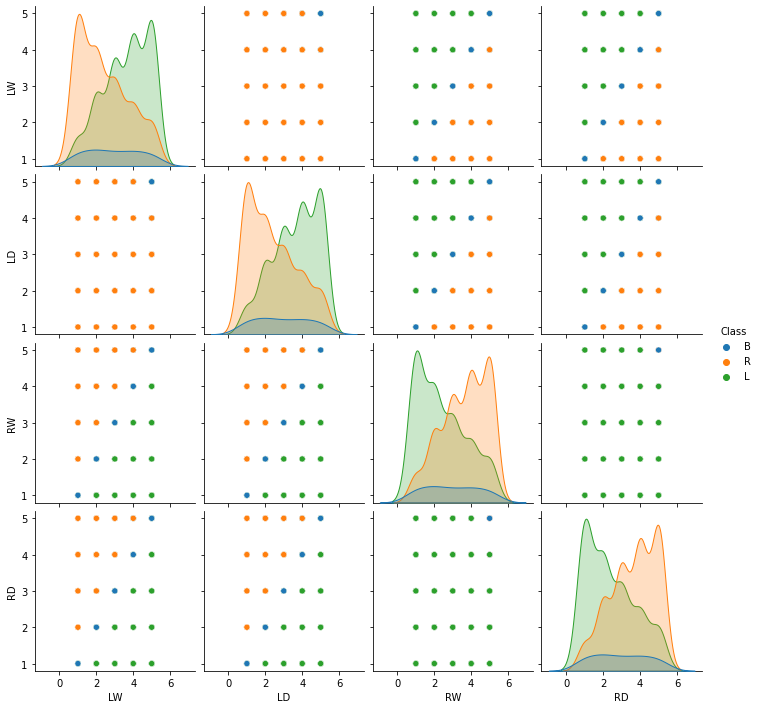

In [4]:
import seaborn as sns
sns.pairplot(data, hue= "Class")